In [1]:
import numpy as np 
import pandas as pd


In [2]:
df = pd.read_csv("UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [4]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [5]:
df.dropna(subset=['END_DATE'], inplace=True)
df.dropna(subset=['CATEGORY'], inplace=True)
df.dropna(subset=['START'], inplace=True)
df.dropna(subset=['STOP'], inplace=True)

df['PURPOSE'].fillna('Unknown', inplace=True)

In [6]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [7]:
unique_categories = df['CATEGORY'].unique()
unique_purposes = df['PURPOSE'].unique()

print("Unique Categories:")
print(unique_categories)
print("\nUnique Purposes:")
print(unique_purposes)

Unique Categories:
['Business' 'Personal']

Unique Purposes:
['Meal/Entertain' 'Unknown' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [8]:
duplicates = df.duplicated()
print(duplicates.sum())

1


In [9]:
duplicate_row = df[df.duplicated()]
print(duplicate_row)

             START_DATE            END_DATE  CATEGORY   START  STOP  MILES  \
492 2016-06-28 23:34:00 2016-06-28 23:59:00  Business  Durham  Cary    9.9   

     PURPOSE  
492  Meeting  


In [10]:
df.drop_duplicates(inplace=True)
summary_stats = df.describe()
print(summary_stats)

             MILES
count  1154.000000
mean     10.567418
std      21.588452
min       0.500000
25%       2.900000
50%       6.000000
75%      10.400000
max     310.300000


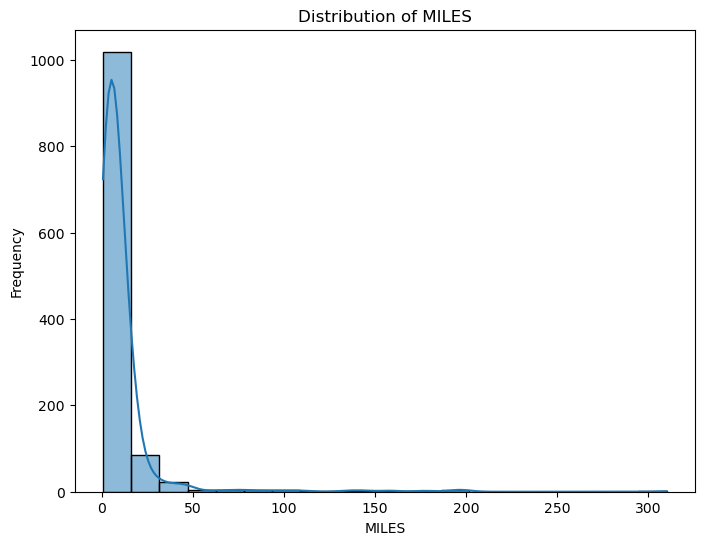

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['MILES'], bins=20, kde=True)
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.title('Distribution of MILES')
plt.show()

In [14]:
import plotly.express as px

Q1 = df['MILES'].quantile(0.25)
Q3 = df['MILES'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

fig_box = px.box(df, y='MILES', title='Box Plot of MILES Column')
fig_box.show()
fig_scatter = px.scatter(df, x=df.index, y='MILES', title='Scatter Plot of MILES Column with Outlier Boundaries')
fig_scatter.add_shape(type='line', x0=0, y0=lower_bound, x1=len(df)-1, y1=lower_bound, line=dict(color='green', dash='dot'))
fig_scatter.add_shape(type='line', x0=0, y0=upper_bound, x1=len(df)-1, y1=upper_bound, line=dict(color='green', dash='dot'))
fig_scatter.show()

In [15]:
df_cleaned = df[(df['MILES'] >= lower_bound) & (df['MILES'] <= upper_bound)]

In [16]:
fig_histogram = px.histogram(df_cleaned, x='MILES', nbins=20, title='Distribution of MILES')
fig_histogram.show()

In [17]:
fig_box_category = px.box(df_cleaned, x='CATEGORY', y='MILES', title='Box Plot of MILES by CATEGORY')
fig_box_category.show()

In [18]:
fig_box_purpose = px.box(df_cleaned, x='PURPOSE', y='MILES', title='Box Plot of MILES by PURPOSE')
fig_box_purpose.show()

In [19]:
fig_scatter_date = px.scatter(df_cleaned, x='START_DATE', y='MILES', title='Scatter Plot of MILES over time')
fig_scatter_date.show()

In [20]:
fig_bar_category = px.bar(df_cleaned, x='CATEGORY', title='Count of Trips by CATEGORY')
fig_bar_category.show()

In [22]:
df_cleaned

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION_MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0
...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,4.0
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0


In [23]:
df_cleaned['TRIP_DURATION_HOURS'] = (df_cleaned['END_DATE'] - df_cleaned['START_DATE']).dt.total_seconds() / (60 * 60)


df_cleaned['DAY_OF_WEEK'] = df_cleaned['START_DATE'].dt.dayofweek



df_cleaned['HOUR_OF_DAY'] = df_cleaned['START_DATE'].dt.hour


df_cleaned['WEEKEND'] = df_cleaned['DAY_OF_WEEK'].isin([5, 6]) 
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_cleaned['TIME_OF_DAY'] = df_cleaned['HOUR_OF_DAY'].apply(get_time_of_day)

C:\Users\user\AppData\Local\Temp\ipykernel_2316\2567410945.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_2316\2567410945.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_2316\2567410945.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [24]:
df_cleaned

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION_MINUTES,TRIP_DURATION_HOURS,DAY_OF_WEEK,HOUR_OF_DAY,WEEKEND,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0.100000,4,21,False,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0,0.200000,5,1,True,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0.216667,5,20,True,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0.233333,1,17,False,Evening
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,0.066667,2,17,False,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,4.0,0.066667,4,23,False,Night
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,0.116667,5,1,True,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,0.300000,5,13,True,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,0.583333,5,15,True,Afternoon


In [25]:
fig_histogram_duration = px.histogram(df_cleaned, x='TRIP_DURATION_HOURS', nbins=20, title='Distribution of Trip Duration')
fig_histogram_duration.show()

df_day_of_week = df_cleaned.groupby('DAY_OF_WEEK')['TRIP_DURATION_HOURS'].count().reset_index()
df_day_of_week['DAY_OF_WEEK'] = df_day_of_week['DAY_OF_WEEK'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})
fig_bar_day_of_week = px.bar(df_day_of_week, x='DAY_OF_WEEK', y='TRIP_DURATION_HOURS', title='Trips by Day of the Week')
fig_bar_day_of_week.show()

In [26]:
df_hourly = df_cleaned.groupby('HOUR_OF_DAY')['TRIP_DURATION_HOURS'].count().reset_index()
fig_bar_hourly = px.bar(df_hourly, x='HOUR_OF_DAY', y='TRIP_DURATION_HOURS', title='Trips by Hour of the Day')
fig_bar_hourly.show()

df_weekend_weekday = df_cleaned.groupby('WEEKEND')['TRIP_DURATION_HOURS'].count().reset_index()
df_weekend_weekday['WEEKEND'] = df_weekend_weekday['WEEKEND'].map({True: 'Weekend', False: 'Weekday'})
fig_pie_weekend_weekday = px.pie(df_weekend_weekday, names='WEEKEND', values='TRIP_DURATION_HOURS', title='Weekend vs. Weekday Trips')
fig_pie_weekend_weekday.show()

In [27]:
df_time_of_day = df_cleaned['TIME_OF_DAY'].value_counts().reset_index()
df_time_of_day.columns = ['TIME_OF_DAY', 'COUNT']
fig_pie_time_of_day = px.pie(df_time_of_day, names='TIME_OF_DAY', values='COUNT', title='Trips by Time of Day')
fig_pie_time_of_day.show()
fig_bar_purpose = px.bar(df_cleaned, x='PURPOSE', title='Trips by Purpose')
fig_bar_purpose.show()

In [28]:
fig_scatter_matrix = px.scatter_matrix(df_cleaned, dimensions=['TRIP_DURATION_HOURS', 'MILES'], title='Correlation Analysis')
fig_scatter_matrix.show()

fig_box_category_duration = px.box(df_cleaned, x='CATEGORY', y='TRIP_DURATION_HOURS', title='Trip Duration by Category')
fig_box_category_duration.show()

fig_box_purpose_duration = px.box(df_cleaned, x='PURPOSE', y='TRIP_DURATION_HOURS', title='Trip Duration by Purpose')
fig_box_purpose_duration.show()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [29]:
df_seasonal = df_cleaned.resample('M', on='START_DATE')['TRIP_DURATION_HOURS'].count().reset_index()
fig_line_seasonal = px.line(df_seasonal, x='START_DATE', y='TRIP_DURATION_HOURS', title='Seasonal Analysis')
fig_line_seasonal.show()

In [30]:
df_cleaned

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION_MINUTES,TRIP_DURATION_HOURS,DAY_OF_WEEK,HOUR_OF_DAY,WEEKEND,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,0.100000,4,21,False,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,12.0,0.200000,5,1,True,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,0.216667,5,20,True,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,0.233333,1,17,False,Evening
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,0.066667,2,17,False,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,2016-12-30 23:06:00,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,4.0,0.066667,4,23,False,Night
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,0.116667,5,1,True,Night
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,0.300000,5,13,True,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,0.583333,5,15,True,Afternoon


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

non_numeric_columns = df_cleaned.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_columns)

Non-Numeric Columns: Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE',
       'WEEKEND', 'TIME_OF_DAY'],
      dtype='object')


In [32]:
df_cleaned1 = df_cleaned.drop(columns=['START_DATE', 'END_DATE', 'CATEGORY','START', 'STOP','PURPOSE',
       'WEEKEND', 'TIME_OF_DAY'])

In [33]:
X = df_cleaned1.drop(columns=['MILES'])  
y = df_cleaned1['MILES']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 13.07
R-squared: 0.41


In [36]:
num_samples = 50
feature_columns = X.columns
new_data = pd.DataFrame(np.random.rand(num_samples, len(feature_columns)), columns=feature_columns)

new_data_scaled = scaler.transform(new_data)

predictions = model.predict(new_data_scaled)

print("Predicted Miles for New Data:")
print(predictions)

Predicted Miles for New Data:
[5.36851847 8.50151541 4.9629649  5.9352448  3.68558663 7.00430323
 8.45944149 6.78415201 8.32982959 3.46722035 4.03273982 3.51755553
 4.8299903  6.57300921 7.64032743 3.58906494 3.33842381 5.58668945
 4.4142602  7.27776175 7.31562365 8.32309873 4.49174552 3.98440022
 7.39142182 3.94668908 4.07094637 3.08486776 5.46507323 4.71938059
 3.00193341 8.09651516 5.167817   7.68711744 5.96435842 4.69101656
 6.65870977 4.40392071 6.71447761 3.28711518 6.64993156 5.12190808
 7.9632885  3.77373807 5.60514145 4.53355401 3.5175737  7.74823427
 6.97184745 3.10823484]


In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


model.fit(X_train_scaled, y_train)


feature_importance = model.feature_importances_


sorted_feature_indices = feature_importance.argsort()[::-1]

num_features_to_keep = 5
selected_feature_indices = sorted_feature_indices[:num_features_to_keep]
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

In [39]:
model_selected = RandomForestRegressor()

model_selected.fit(X_train_selected, y_train)

RandomForestRegressor()

In [40]:
y_pred_selected = model_selected.predict(X_test_selected)

mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Mean Squared Error (Selected Features): {mse_selected:.2f}")
print(f"R-squared (Selected Features): {r2_selected:.2f}")

Mean Squared Error (Selected Features): 11.56
R-squared (Selected Features): 0.48


In [41]:
print(f"Mean Squared Error (All Features): {mse:.2f}")
print(f"R-squared (All Features): {r2:.2f}")

Mean Squared Error (All Features): 13.07
R-squared (All Features): 0.41


In [42]:
predictions_selected = model_selected.predict(new_data_scaled)
predictions_selected

array([7.7735    , 8.49316667, 8.1843    , 8.18316667, 6.62216667,
       8.40616667, 8.53216667, 8.46016667, 8.52316667, 6.979     ,
       6.1515    , 6.59033333, 9.03956667, 8.42116667, 8.3105    ,
       6.47816667, 7.69233333, 7.93016667, 6.54466667, 8.39516667,
       8.3105    , 8.49316667, 7.12066667, 6.61683333, 8.3105    ,
       6.35683333, 6.38175   , 9.05      , 7.7995    , 9.43983333,
       9.435     , 8.49316667, 7.70996667, 8.3105    , 8.11516667,
       9.74916667, 8.4755    , 6.87583333, 8.40416667, 7.71483333,
       8.46016667, 8.16263333, 8.46816667, 6.1755    , 8.24216667,
       7.12066667, 7.44166667, 8.3365    , 8.2735    , 8.11033333])

In [43]:
print(f"Number of samples in y_test: {len(y_test)}")
print(f"Number of samples in predictions_selected: {len(predictions_selected)}")

print(f"Number of features selected: {num_features_to_keep}")

print(f"Indices of selected features: {selected_feature_indices}")

Number of samples in y_test: 216
Number of samples in predictions_selected: 50
Number of features selected: 5
Indices of selected features: [1 0 3 2]


In [44]:
num_features_to_keep = 5
selected_feature_indices = sorted_feature_indices[:num_features_to_keep]

X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

print(f"Shape of X_test_selected: {X_test_selected.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_test_selected: (216, 4)
Shape of y_test: (216,)


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_selected = model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Mean Squared Error (Selected Features): {mse_selected:.2f}")
print(f"R-squared (Selected Features): {r2_selected:.2f}")

Mean Squared Error (Selected Features): 11.56
R-squared (Selected Features): 0.48


In [46]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train_selected, y_train)
y_pred_svr = svr_model.predict(X_test_selected)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression (SVR) Results:")
print(f"Mean Squared Error (SVR): {mse_svr:.2f}")
print(f"R-squared (SVR): {r2_svr:.2f}")

Support Vector Regression (SVR) Results:
Mean Squared Error (SVR): 9.56
R-squared (SVR): 0.57


In [47]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
mse_scores = cross_val_score(svr_model, X_train_selected, y_train, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(svr_model, X_train_selected, y_train, scoring='r2', cv=kf)
mse_scores = -mse_scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()
std_mse = mse_scores.std()
std_r2 = r2_scores.std()

print("Cross-Validation Results:")
print(f"Mean Squared Error: {mean_mse:.2f} (+/- {std_mse:.2f})")
print(f"R-squared: {mean_r2:.2f} (+/- {std_r2:.2f})")

Cross-Validation Results:
Mean Squared Error: 10.21 (+/- 0.87)
R-squared: 0.53 (+/- 0.04)


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_selected, y_train)
y_pred_gb = gb_model.predict(X_test_selected)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor Results:")
print(f"Mean Squared Error (Gradient Boosting): {mse_gb:.2f}")
print(f"R-squared (Gradient Boosting): {r2_gb:.2f}")

Gradient Boosting Regressor Results:
Mean Squared Error (Gradient Boosting): 9.91
R-squared (Gradient Boosting): 0.55


In [49]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_selected, y_train)
y_pred_ridge = ridge_model.predict(X_test_selected)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print(f"Mean Squared Error (Ridge Regression): {mse_ridge:.2f}")
print(f"R-squared (Ridge Regression): {r2_ridge:.2f}")

Ridge Regression Results:
Mean Squared Error (Ridge Regression): 13.07
R-squared (Ridge Regression): 0.41


Feature 0: Importance = 0.26
Feature 1: Importance = 0.26
Feature 3: Importance = 0.00
Feature 2: Importance = -0.01


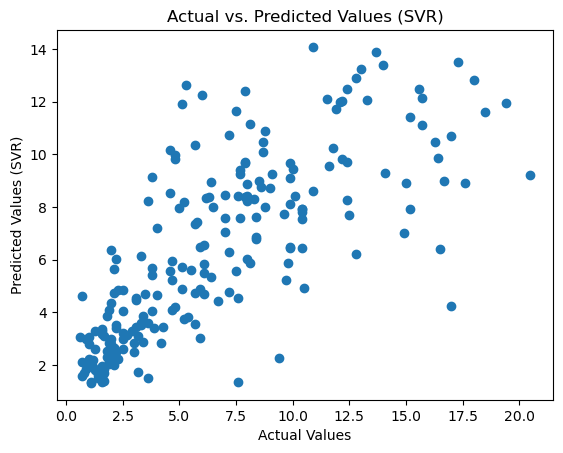

In [50]:
from sklearn.inspection import permutation_importance
result = permutation_importance(svr_model, X_test_selected, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean
sorted_feature_indices = importance.argsort()[::-1]
most_important_features = selected_feature_indices[sorted_feature_indices]
for feature_idx, score in zip(most_important_features, importance[sorted_feature_indices]):
    print(f"Feature {feature_idx}: Importance = {score:.2f}")
import matplotlib.pyplot as plt

y_actual = y_test  
y_pred_svr = svr_model.predict(X_test_selected)  

plt.scatter(y_actual, y_pred_svr)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (SVR)")
plt.title("Actual vs. Predicted Values (SVR)")
plt.show()

In [51]:
predictions_new_data = svr_model.predict(new_data_scaled[:, selected_feature_indices])

print("Predictions for New Data:")
print(predictions_new_data)

Predictions for New Data:
[7.63397129 9.06305669 7.23790622 8.43448558 6.66916832 8.98434527
 9.08526647 8.86997115 9.0873837  6.07878407 6.92366883 6.01882845
 7.17008142 8.78508514 9.05952584 6.57954691 6.1082098  8.1600549
 6.5447065  9.01153957 9.02426663 9.07621846 7.01397575 6.65523604
 9.013408   6.76203069 6.70219512 6.0116142  7.82532109 7.13845451
 6.38245663 9.09891309 7.8630842  9.07240779 8.50894612 7.17442505
 8.76192724 7.24348853 8.87820322 6.37041919 8.80828285 7.58247351
 9.07869929 6.19675172 8.10606155 6.86472573 6.51870454 9.0845779
 8.87681986 6.12914652]
